<a href="https://colab.research.google.com/github/Xavier-ML/Computational-Physics-with-Python/blob/main/05d_Fourier_transform_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourier transform
- Börge Göbel

In [11]:
import numpy as np
import matplotlib.pyplot as plt 

## Recall integrals

In [12]:
def integralTrapezoidal(data):
    a = 0
    for i in range( len(data[0]) - 1 ):
        a = a + ( data[1,i+1] + data[1,i] ) / 2 * ( data[0,i+1] - data[0, i] )
    return a

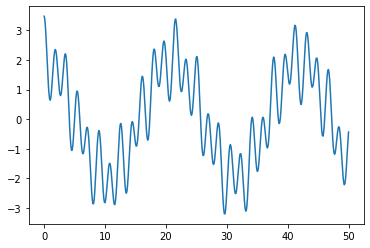

In [15]:
tlist = np.linspace(0,50,501)

freq1 = 2.0
freq2 = 0.3
freq3 = 3.5

ylist = 0.5*np.cos(tlist*freq1 + 0.3) + 2.0*np.cos(tlist*freq2) + 1.0*np.cos(tlist*freq3)

data = np.array([tlist,ylist])
plt.plot(data[0],data[1])

In [16]:
integralTrapezoidal(data)

3.9777009877621277

## Fourier transform to find characteristic frequencies

\\(
\tilde{y}(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} y(t) e^{i\omega t}\mathrm{d}t
\\)

In [18]:
omega = 0.3
integrand = np.array([tlist, 1/np.sqrt(2*np.pi) * ylist * np.exp(1j*omega*tlist)])

print(abs(integralTrapezoidal(integrand))**2)

373.98754846897106


In [26]:
ft = np.array(
    [[om,integralTrapezoidal( np.array([tlist, 1/np.sqrt(2*np.pi) *ylist * np.exp(1j*om*tlist)]) )] for om in np.linspace(0,10,1001)

    ]
)

In [27]:
ft[:,0]

array([ 0.  +0.j,  0.01+0.j,  0.02+0.j, ...,  9.98+0.j,  9.99+0.j,
       10.  +0.j])

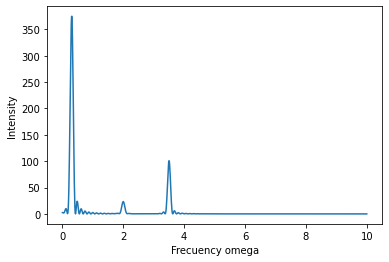

In [28]:
plt.xlabel("Frecuency omega")
plt.ylabel("Intensity")

plt.plot(ft[:,0].real, abs(ft[:,1])**2)

In [31]:
ft[25:35]

array([[ 0.25       +0.j        ,  5.13976081-13.12300671j],
       [ 0.26       +0.j        ,  9.12092078-12.77901015j],
       [ 0.27       +0.j        , 12.99531827-11.07836908j],
       [ 0.28       +0.j        , 16.26371891 -8.10097747j],
       [ 0.29       +0.j        , 18.48187614 -4.11682165j],
       [ 0.3        +0.j        , 19.33358327 +0.44733276j],
       [ 0.31       +0.j        , 18.68515335 +5.06910819j],
       [ 0.32       +0.j        , 16.61095756 +9.20973395j],
       [ 0.33       +0.j        , 13.38462931+12.39782423j],
       [ 0.34       +0.j        ,  9.43672549+14.30298549j]])

In [36]:
from numpy.core.fromnumeric import shape
shape(ft)

(1001, 2)

In [29]:
ft[25:35,0]

array([0.25+0.j, 0.26+0.j, 0.27+0.j, 0.28+0.j, 0.29+0.j, 0.3 +0.j,
       0.31+0.j, 0.32+0.j, 0.33+0.j, 0.34+0.j])

In [30]:
abs(ft[25:35,0])**2

array([0.0625, 0.0676, 0.0729, 0.0784, 0.0841, 0.09  , 0.0961, 0.1024,
       0.1089, 0.1156])

## Use numpy module: Fast Fourier transform (FFT)

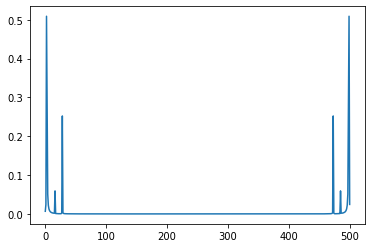

In [24]:
ft = np.fft.fft(ylist)/len(ylist)

plt.plot(abs(ft)**2 ) 

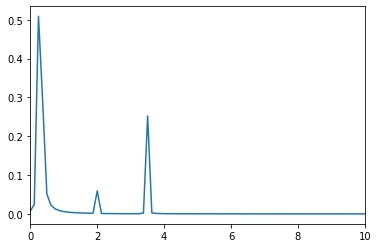

In [25]:
frequencies = np.arange(len(ylist)) / ( len(ylist)*0.1 )

plt.xlim([0, 10])
plt.plot( frequencies*2*np.pi, abs(ft)**2 ) 